We show a few examples of how to use WarpScript code in a notebook.

In [1]:
# Make sure that warpscript.py and permalink.py are in your python path
from warpscript import post
from permalink import generate

(Example 1) We write a file containing warpscript code

In [2]:
%%writefile hello.mc2

'hello world'
NOW

Overwriting hello.mc2


(1a) We can post it to a warp 10 instance and print the json response

In [3]:
""" Per default: `post(warpscript,
                       url='https://warp.cityzendata.net/api/v0/exec'
                       token=None,
                       gzip=False,
                       timeout=None,
                       verifySSL=True)`
"""

print post('hello.mc2')

[
  1484838140647330, 
  "hello world"
]


(1b) Or we can generate a permalink to a quantum instance

In [4]:
""" Per default: `generate(warpscript,
                           plot=False,
                           url='https://warp.cityzendata.net/api/v0/exec',
                           url_quantum='https://home.cityzendata.net/quantum/',
                           token=None)`
"""

print generate('hello.mc2')

https://home.cityzendata.net/quantum/#/warpscript/CidoZWxsbyB3b3JsZCcKTk9X/aHR0cHM6Ly93YXJwLmNpdHl6ZW5kYXRhLm5ldC9hcGkvdjAvZXhlYw==


(Example 2) Let's create a GTS and plot it ...

In [5]:
%%writefile gts_example.mc2

NEWGTS 1 1000 <% 'i' STORE $i 1 w * NaN NaN NaN $i PI 120 / * COS ADDVALUE %> FOR
'Cosinus example' RENAME

Overwriting gts_example.mc2


(2a) ... inside the notebook (with matplotlib)

In [6]:
# Plotting parameters
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 6.0)
import mpld3
mpld3.enable_notebook()
#import numpy as np

In [7]:
# Reading GTS from Json 
import json
gts = json.loads(post('gts_example.mc2'))[0]['v']
gts = [data_point[1] for data_point in gts]

<function matplotlib.pyplot.show>

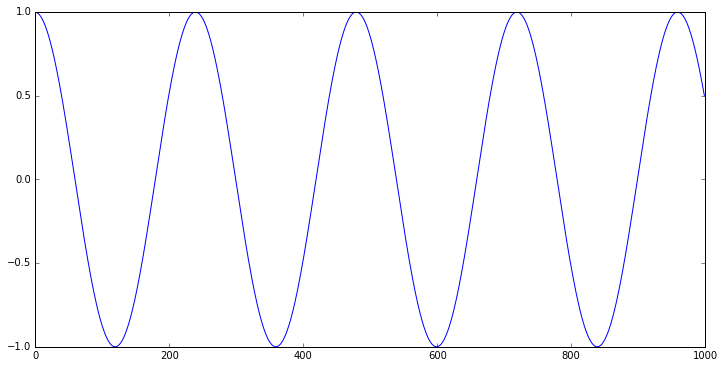

In [8]:
# Plotting
plt.plot(gts)
plt.show

(2b) ... or in a quantum instance

In [9]:
print generate('gts_example.mc2', plot=True)

https://home.cityzendata.net/quantum/#/plot/Ck5FV0dUUyAxIDEwMDAgPCUgJ2knIFNUT1JFICRpIDEgdyAqIE5hTiBOYU4gTmFOICRpIFBJIDEyMCAvICogQ09TIEFERFZBTFVFICU+IEZPUgonQ29zaW51cyBleGFtcGxlJyBSRU5BTUU=/aHR0cHM6Ly93YXJwLmNpdHl6ZW5kYXRhLm5ldC9hcGkvdjAvZXhlYw==
